In [1]:
%matplotlib inline
from pylab import *

from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

In [2]:
faces.keys()
len(faces.data)

400

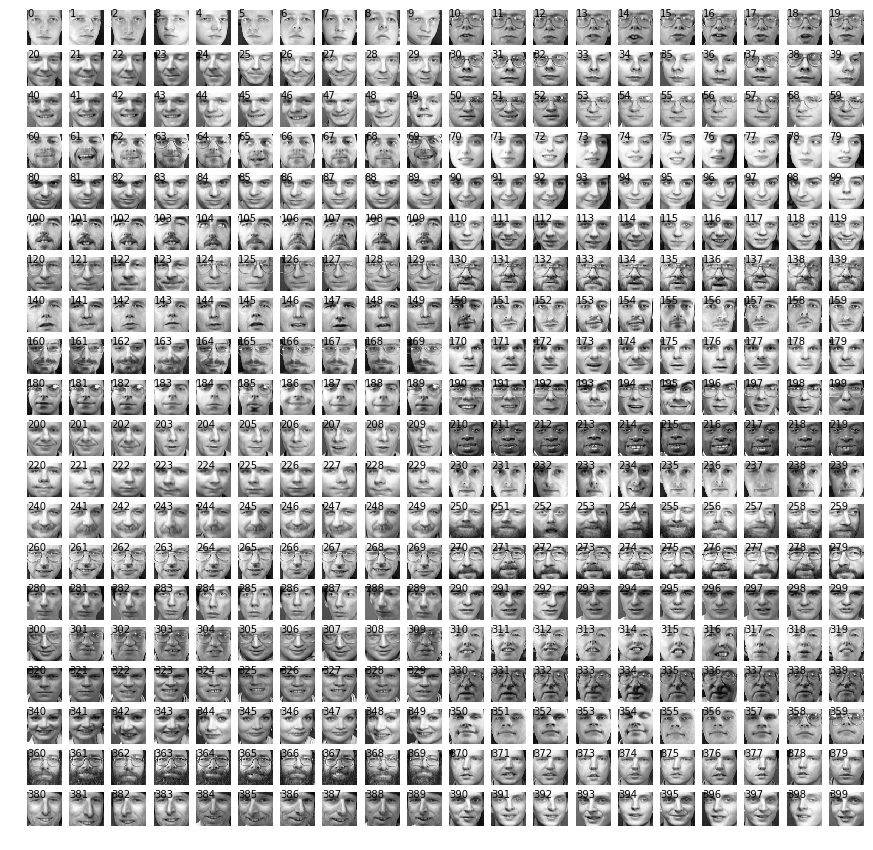

In [13]:
matplotlib.rcParams.update({'figure.figsize': (15.0, 15.0)})
for i in range(400):
    face = faces.images[i]
    subplot(20, 20, i+1)
    imshow(face.reshape((64, 64)), cmap='gray')
    text(0, 10, str(i))
    axis('off')

In [4]:
from ipywidgets import interact
import ipywidgets as widgets

from IPython.display import display, clear_output

import json

In [7]:
class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print(self.index)
                self.index += 1
            return self.index
    
    def record_result(self, smile=True):
        self.results[str(self.index)] = smile

In [9]:
trainer = Trainer()


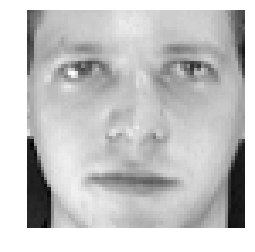

In [10]:
button_smile = widgets.Button(description='smile')
button_no_smile = widgets.Button(description='sad face')

def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')

def update_smile(b):
    trainer.record_result(smile=True)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

def update_no_smile(b):
    trainer.record_result(smile=False)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)

display(button_smile)
display(button_no_smile)
display_face(trainer.imgs[trainer.index])

In [10]:
with open('results.xml', 'w') as f:
    json.dump(trainer.results, f)

In [12]:
trainer.index

0

D:\Users\s36733\Documents\software\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


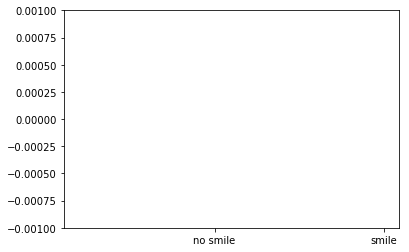

In [11]:
yes, no = (sum([trainer.results[x] == True for x in trainer.results]), 
            sum([trainer.results[x] == False for x in trainer.results]))
bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile']);

In [30]:
results = json.load(open('results.xml'))


In [16]:
smiling_indices = [20,21,26,27,40,41,42,43,44,45,46,47,48,49,51,61,69,72,86,90,91,111,114,116,119,123,129,141,153,160,161,162,163,164,167,174,186,190,191,197,200,201,202,213,214,216,234,240,242,246,255,260,261,268,276,300,305,324,340,341,343,348,367,380,381,382,383,384,385,386,387,388,393,396,397,399]

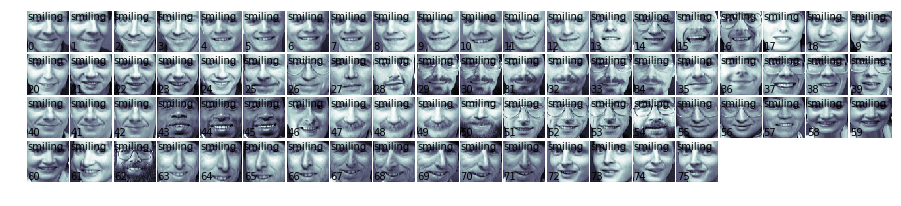

In [17]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)
    
    # label the image with the target value
    p.text(0, 14, "smiling")
    p.text(0, 60, str(i))
    p.axis('off')

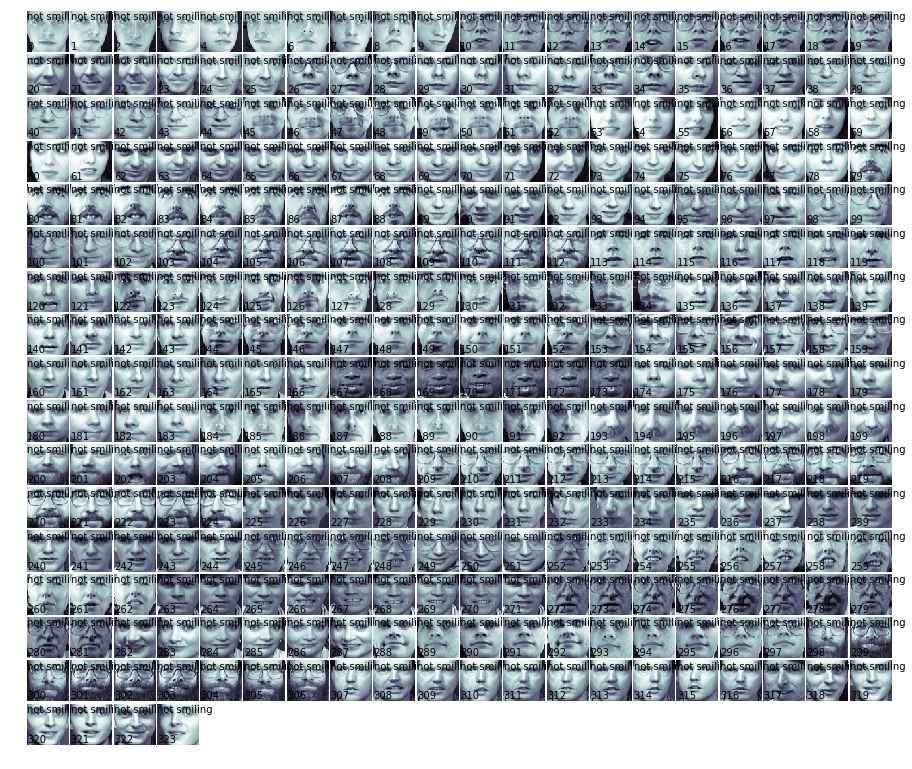

In [19]:
not_smiling_indices = list(set(range(400)) - set(smiling_indices))

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(not_smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[not_smiling_indices[i]], cmap=plt.cm.bone)

    # label the image with the target value
    p.text(0, 14, "not smiling")
    p.text(0, 60, str(i))
    p.axis('off')

In [66]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

indices = [i for i in trainer.results]
data = faces.data[range(len(trainer.results)), :]

target = [trainer.results[i] for i in trainer.results]
target = array(target).astype(int32)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.25, random_state=0)

from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [67]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.92307692  0.76923077  0.72        0.84        0.96      ]
Mean score: 0.842 (+/-0.045)


In [68]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [69]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.93023255814
Classification Report:
             precision    recall  f1-score   support

          0       0.89      1.00      0.94        24
          1       1.00      0.84      0.91        19

avg / total       0.94      0.93      0.93        43

Confusion Matrix:
[[24  0]
 [ 3 16]]


this person is smiling: [ True]


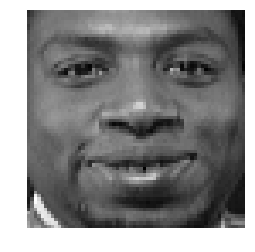

In [72]:
random_image_button = widgets.Button(description="New image!")

def display_face_and_prediction(b):
    index = randint(169, 400)
    face = faces.images[index]
    face_dat = faces.data[index]
    display_face(face)
    print("this person is smiling: {0}".format(svc_1.predict(face_dat.reshape(1,-1))==1))

random_image_button.on_click(display_face_and_prediction)
display(random_image_button)
display_face_and_prediction(0)

In [77]:
from scipy.ndimage import zoom
import matplotlib.image as mpimg

TypeError: Invalid dimensions for image data

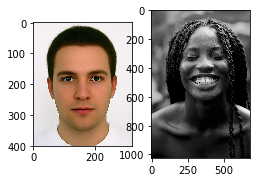

In [91]:
img = mpimg.imread('new_face.jpg')
img2 = mpimg.imread('new_face_smile.jpg')

new_extracted_face = zoom(img2, (64. / img2.shape[0], 64. / img2.shape[1], 3))

subplot(1, 3, 1)
imshow(img, cmap='gray')
subplot(1, 3, 2)
imshow(img2, cmap='gray')
subplot(1, 3, 2)
imshow(new_extracted_face, cmap='gray')
axis('off')

In [90]:
new_extracted_face

array([[[ 79,  79,  79, ...,  79,  79,  79],
        [ 85,  85,  85, ...,  85,  85,  85],
        [ 92,  92,  92, ...,  92,  92,  92],
        ..., 
        [ 89,  89,  89, ...,  89,  89,  89],
        [ 97,  97,  97, ...,  97,  97,  97],
        [104, 104, 104, ..., 104, 104, 104]],

       [[ 75,  75,  75, ...,  75,  75,  75],
        [ 82,  82,  82, ...,  82,  82,  82],
        [ 86,  86,  86, ...,  86,  86,  86],
        ..., 
        [103, 103, 103, ..., 103, 103, 103],
        [109, 109, 109, ..., 109, 109, 109],
        [114, 114, 114, ..., 114, 114, 114]],

       [[ 82,  82,  82, ...,  82,  82,  82],
        [ 84,  84,  84, ...,  84,  84,  84],
        [ 85,  85,  85, ...,  85,  85,  85],
        ..., 
        [115, 115, 115, ..., 115, 115, 115],
        [119, 119, 119, ..., 119, 119, 119],
        [121, 121, 121, ..., 121, 121, 121]],

       ..., 
       [[ 22,  22,  22, ...,  22,  22,  22],
        [ 19,  19,  19, ...,  19,  19,  19],
        [ 17,  17,  17, ...,  17,  17, 